<a href="https://colab.research.google.com/github/zorazr/stacked-card-list/blob/master/LSTMstockpricepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data
from pylab import plt
# the above line has the same effect as
#import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [ ]:
df = data.get_data_yahoo(tickers='^HSI',start='2004-01-02', end='2009-06-30')
df = df['Close']
df

[*********************100%***********************]  1 of 1 completed


Date
2004-01-02    12801.480469
2004-01-05    13005.330078
2004-01-06    13036.320312
2004-01-07    13157.679688
2004-01-08    13203.589844
                  ...     
2009-06-23    17538.369141
2009-06-24    17892.150391
2009-06-25    18275.029297
2009-06-26    18600.259766
2009-06-29    18528.509766
Name: Close, Length: 1354, dtype: float64

In [ ]:
#To reduce the running time
df = df[:1500]

In [ ]:
df

Date
2004-01-02    12801.480469
2004-01-05    13005.330078
2004-01-06    13036.320312
2004-01-07    13157.679688
2004-01-08    13203.589844
                  ...     
2009-06-23    17538.369141
2009-06-24    17892.150391
2009-06-25    18275.029297
2009-06-26    18600.259766
2009-06-29    18528.509766
Name: Close, Length: 1354, dtype: float64

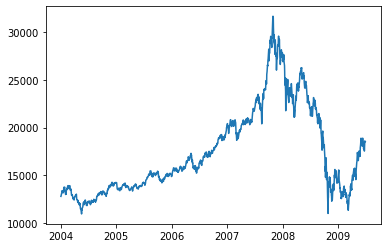

In [ ]:
plt.plot(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rdata = scaler.fit_transform(np.array(df).reshape(-1,1))
training_size=int(len(rdata)*0.65)
train_period,test_period=rdata[:training_size],rdata[training_size:]

In [ ]:
rdata

array([[0.08871696],
       [0.09857878],
       [0.10007803],
       ...,
       [0.35351608],
       [0.36925006],
       [0.36577894]])

In [ ]:
train_period

In [ ]:
test_period

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
train = TimeseriesGenerator(train_period, train_period, length=100, batch_size=1000)
test = TimeseriesGenerator(test_period, test_period, length=100, batch_size=1000)
X_train, y_train = list(train)[0][0], list(train)[0][1]
X_test, y_test = list(test)[0][0], list(test)[0][1]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
13/13 [==============================] - 4s 262ms/step - loss: 3.9816e-04 - val_loss: 0.0066
Epoch 2/10
13/13 [==============================] - 3s 222ms/step - loss: 3.8739e-04 - val_loss: 0.0061
Epoch 3/10
13/13 [==============================] - 3s 221ms/step - loss: 4.4627e-04 - val_loss: 0.0077
Epoch 4/10
13/13 [==============================] - 4s 314ms/step - loss: 4.0034e-04 - val_loss: 0.0055
Epoch 5/10
13/13 [==============================] - 3s 222ms/step - loss: 3.8583e-04 - val_loss: 0.0046
Epoch 6/10
13/13 [==============================] - 3s 222ms/step - loss: 3.7373e-04 - val_loss: 0.0048
Epoch 7/10
13/13 [==============================] - 3s 223ms/step - loss: 3.7367e-04 - val_loss: 0.0052
Epoch 8/10
13/13 [==============================] - 4s 297ms/step - loss: 3.8260e-04 - val_loss: 0.0047
Epoch 9/10
13/13 [==============================] - 3s 239ms/step - loss: 3.7666e-04 - val_loss: 0.0057
Epoch 10/10
13/13 [==============================] - 3s 226ms/st

In [ ]:
train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))

12/12 [==============================] - 1s 46ms/step


<function matplotlib.pyplot.show(*args, **kw)>

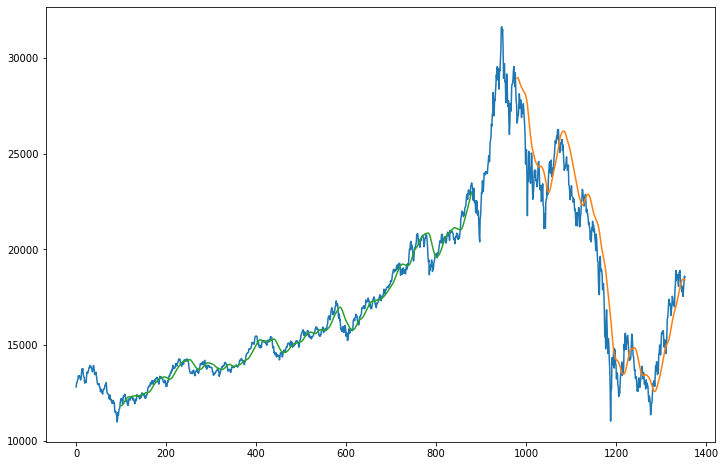

In [ ]:
look_back=100
trainPredictPlot=np.empty_like(rdata)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_pred

testPredictPlot=np.empty_like(rdata)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(rdata)] = test_pred

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)

plt.show

In [ ]:
testPredictPlot.shape


(1354, 1)

<function matplotlib.pyplot.show(*args, **kw)>

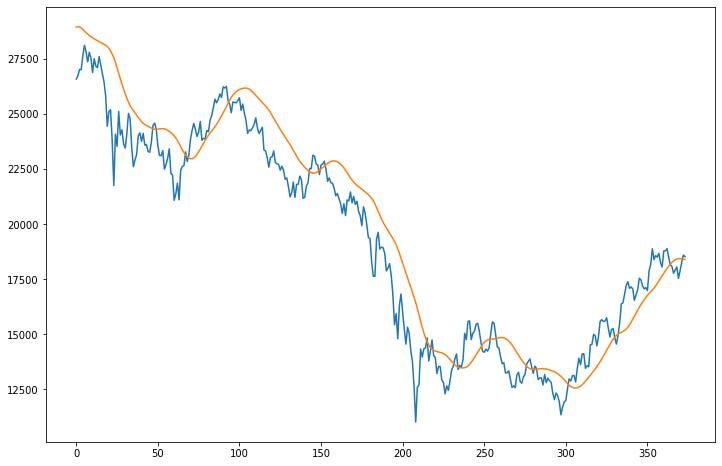

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata)[len(train_pred)+(look_back*2):len(rdata)])
plt.plot(test_pred)
plt.show